**Applied Machine Learning - MNIST Project**
---
##University of Bologna - Italy

##Bioinformatics

*Gaia Cervi*

---

**MNIST database** (*Modified National Institute of Standards and Technology database*)  is a large database of handwritten digits (0 to 9) that is commonly used for training various image processing systems. The database contains 60,000 training images and 10,000 testing images each of size 28x28.  

##**Aim of the project**
The goal of this project is to produce different Machine Learning models and to evaluate/compare their performance. I focused on:
- Decision Tree
- Random Forest
- Extremely Randomized Tree
- Support Vector Machines
- Convolutional Neural Networks


## Import Modules

In [ ]:
import sklearn
from sklearn import metrics
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

## Import MNIST dataset and Data preparation
---
The MNIST dataset can be easily loaded from *Keras library*. 

When we load the dataset:
- *X_train* and *y_train* contain all the training examples and the relative labels.
- *X_test* and *y_test* contain all the testing examples and associated labels. 




In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
print('X_test_type: ', X_test.dtype)
print('y_test_type: ', y_test.dtype)

X_test_type:  uint8
y_test_type:  uint8


### Display the first 10 digits of the training set 

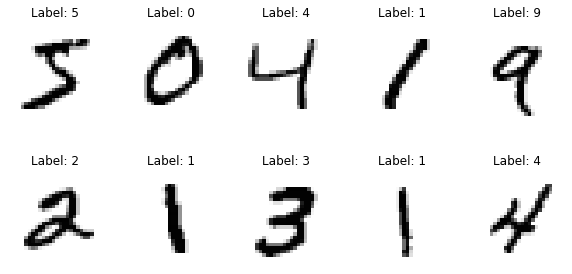

In [ ]:
num_row = 2
num_col = 5 
fig, axes = plt.subplots(num_row,num_col,figsize = (10,5))

for i in range(num_row*num_col):
    digit = X_train[i]
    ### reshaping the numpy array of 784 elements into a matrix 28X28
    digit_image = np.reshape(digit,(28,28)) 
    ax = axes[i//num_col, i%num_col]
    ax.imshow(digit_image, cmap = 'binary', interpolation = 'nearest')
    ax.set_title(label = 'Label: {}'.format(y_train[i]))
    ax.axis('off')
plt.show()


#### Plot of the distribution of classes across the training dataset.

C:\Users\david\anaconda3\envs\AML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of classes across the MNIST dataset - training')

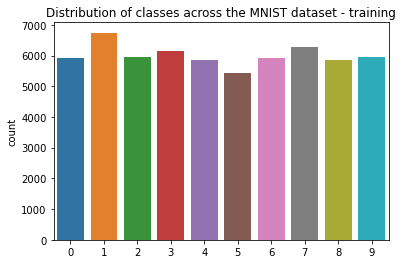

In [ ]:
sns.countplot(np.sort(y_train))
plt.title('Distribution of classes across the MNIST dataset - training')


From the above graph, we can see that all classes are present in almost equal amount around 6000 examples. Worth to be noticed is that class 1 is the most present, whereas class 5 is the least present. 

#### Plot the distribution of classes among the training and testing datasets.  

In [ ]:
# Define a function which takes in input the training or testing labels (y) and the total number of examples (tot) and returns a dictionary with the counts for each class.  

def table(y,tot):
    d = {}
    for label in y: 
        if label not in d.keys():
            d[label] = 1 
        else: 
            d[label] += 1 
    for key in d.keys():
        d[key] = d[key] / tot
    return d

train = table(np.sort(y_train),60000)  
test = table(np.sort(y_test),10000)

In [ ]:
# Convert the dictionaries into pandas dataframes which are concantenate into a single one for both training and test set.
train_df = pd.DataFrame(list(train.items()), columns = ['label','value'])       
train_df['variable'] = 'train'
test_df = pd.DataFrame(list(test.items()), columns = ['label','value'])       
test_df['variable'] = 'test'

dataframe = pd.concat([train_df,test_df])


Text(0.5, 1.0, 'Frequency distribution of labels across train and test splits')

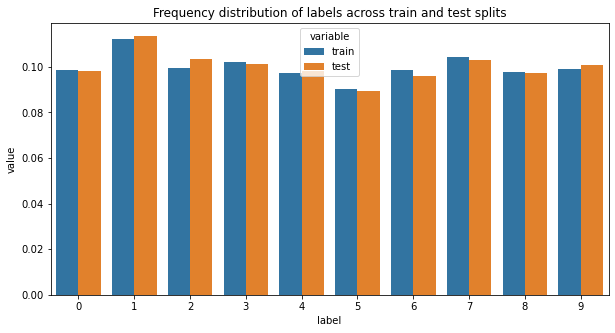

In [ ]:
# Plot
plt.figure(figsize = (10,5))
sns.barplot(x = 'label', y = 'value', hue = 'variable', data = dataframe)

plt.title('Frequency distribution of labels across train and test splits')

From the above graph, we can see that the distribution of classes between the training and testing set is very similar. Therefore, the two datasets are balanced.  

## 1. Decision Trees
---
A ***decision tree*** is a supervised ML learning method used for both classification and regression problems. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 

Each internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. 


In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report,accuracy_score  

### Grid Search on a DecisionTreeClassifier

I previously run a decision tree without restricting the value of max_depth value. The tree was grown till all leaves were pure. The max_depth value of the given tree was 50. Therefore I decided to perform a grid search to see whether by restricting the max_depth and min_sample leaf values the model generalizes better.
***min_sample_leaf***: minimum number of samples required to be a leaf node. The algorithm keeps splitting data only if both the left and right branches have at least a number of examples >= min_sample_leaf.  
***max_depth_value*** : maximum depth of the tree.
The grid search was done by using ***GridSearchCV*** from *sklearn*.

- ***max_depth value*** = 10,20,30,40,50 
and 
- ***min_sample_leaf*** =  1,0.1%

In [ ]:
tree_clf = DecisionTreeClassifier()
grid_search_clf = GridSearchCV(tree_clf, 
                               param_grid = {'max_depth':[10,20,30,40,50],'min_samples_leaf':[1,0.01]}) 

In [ ]:
#reshaping data
X_train = X_train.flatten().reshape(60000,784)
X_test = X_test.flatten().reshape(10000,784)

In [ ]:
grid_search_clf.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 0.01]})

In [ ]:
cv_results_tree = pd.DataFrame(grid_search_clf.cv_results_)
pd.pivot_table(cv_results_tree, 
               index = ['param_max_depth','param_min_samples_leaf'], 
               values = ['mean_test_score','std_test_score','rank_test_score'])

mean_test_score  rank_test_score  \
param_max_depth param_min_samples_leaf                                     
10              0.01                           0.698333                6   
                1.00                           0.849250                5   
20              0.01                           0.698333                6   
                1.00                           0.869167                1   
30              0.01                           0.698333                6   
                1.00                           0.867283                2   
40              0.01                           0.698333                6   
                1.00                           0.867267                3   
50              0.01                           0.698333                6   
                1.00                           0.866317                4   

                                        std_test_score  
param_max_depth param_min_samples_leaf                  
10              0.01                          0.019573  
                1.00                          0.007257  
20              0.01                          0.019573  
                1.00                          0.007281  
30              0.01                          0.019573  
                1.00                          0.006991  
40              0.01                          0.019573  
                1.00                          0.006957  
50              0.01                          0.019573  
                1.00                          0.007445

The score indicated as mean_test_score is the multiclass accuracy.The best performance is reached for 
- ***max_depth = 20*** and
-***min_sample_leaf = 1***.
We can see that for all Max_depth options, when the min_samples_leaf was constrained to 0.1% the performance decreased significantly.



#### Model testing on the left-out data
By default, the best estimator is refitted on the whole training set and the model can be used to make predictions on the test set.

In [ ]:
pred_optimized = grid_search_clf.best_estimator_.predict(X_test)
print(classification_report(y_test,pred_optimized))

accuracy_tree= accuracy_score(y_test,pred_optimized)
print("Accuracy:", accuracy_tree)

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.95      0.96      0.96      1135
           2       0.86      0.85      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.88      0.88      0.88       982
           5       0.84      0.84      0.84       892
           6       0.89      0.89      0.89       958
           7       0.91      0.91      0.91      1028
           8       0.84      0.80      0.82       974
           9       0.84      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy: 0.8799


As in the data exploration section, it has been checked  that both training and testing sets are balanced in terms of number of examples per class, there is no need to normalize the confusion matrix across rows. 

Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

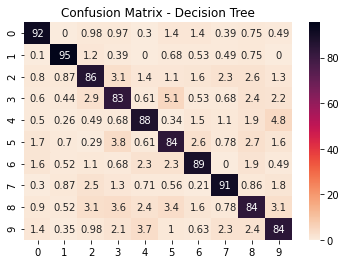

In [ ]:
tree_matrix = confusion_matrix(y_test, pred_optimized)

### Transform the values in percentages 
percentages = tree_matrix/tree_matrix.sum(axis=0)*100

t = sns.heatmap(percentages, annot=True, cmap="rocket_r")
plt.title("Confusion Matrix - Decision Tree")

From the graph above, it can be seen that most of the true labels are correctly predicted. The highest percentage of misclassification is seen for class 9 and 4: 
- in 4.4% of cases number 4 is predicted as 9 and 
- in 4% of cases number 9 is seen as 4.

The second highest error percentage involves number 3 and 5:
- in 3.9% of cases number 3 is predicted as 5,
- in 3.7% of cases number 5 is seen as 3.

This is probably due to the fact that these four digits appear to be similar, so they may be hard to be recognized by the model. In fact it is very rare that a digit like "0" is predicted as "1", since their representations are totally different. The number which is correctly predicted the most is 1 with 95% of correct predictions.


The accuracy reached with this method is equal to 88%, which is not a bad result but we will see now other approaches that will significantly increase the performance.

## 2. Random Forest  with Random Forest Classifier
---
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Grid search in Random Forest with Random Forest Classifier

The criterion for evaluating the best set of hyperparameters is the ***out-of-bag score***. As the performance is evaluated on the out-of-bag examples, there is no need to have a proper validation set. But as the GridSearchCV function requires a cv parameter ≠ 1, the model will be trained on the entire training set -1 examples (59999) which will be given as validation set (1) and not used. 
The ***max_features*** parameter defines the number of features that are randomly sampled when looking for the best split: in this case I tested 'sqrt' = 3%, 10% and 30%. Whereas the ***n_estimators*** is the number of decision trees thay are trained.   

In [ ]:
# Function which given an estimator and a dataset returns the oob_score.
def oob_scorer(estimator,X,y):
    return estimator.oob_score_

In [ ]:
from sklearn.model_selection import PredefinedSplit

# Define the cross-validation split
cv = PredefinedSplit([-1]*(X_train.shape[0]-1)+[0])

for (train, test) in cv.split(X_train,y_train):
  print('train_set:',len(train), '\n' 
        'validation_set:',len(test))

train_set: 59999 
validation_set: 1


In [ ]:
clf = RandomForestClassifier(oob_score = True,
                             n_jobs = -1,
                             random_state = 42)

grid_search_clf = GridSearchCV(clf, 
                               param_grid = {'n_estimators':[300,450,600],'max_features':['sqrt',0.1,0.3]}, 
                               cv = cv, 
                               scoring = oob_scorer) 

In [ ]:
grid_search_clf.fit(X_train,y_train)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             param_grid={'max_features': ['sqrt', 0.1, 0.3],
                         'n_estimators': [300, 450, 600]},
             scoring=<function oob_scorer at 0x000001DC6BC881F0>)

In [ ]:
rforest_cv_results = pd.DataFrame(grid_search_clf.cv_results_)
pd.pivot_table(rforest_cv_results, index = ['param_max_features','param_n_estimators'], values = ['mean_test_score','rank_test_score'])

mean_test_score  rank_test_score
param_max_features param_n_estimators                                  
0.1                300                        0.969783                5
                   450                        0.970283                2
                   600                        0.970416                1
0.3                300                        0.968649                9
                   450                        0.968916                8
                   600                        0.969283                6
sqrt               300                        0.969149                7
                   450                        0.970050                4
                   600                        0.970266                3

Text(0.5, 1.0, 'Confusion matrix - Random Forest')

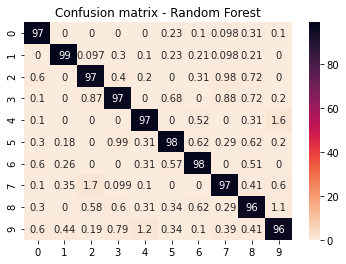

In [ ]:
rforest_pred = grid_search_clf.best_estimator_.predict(X_test)
forest_matrix = confusion_matrix(y_test,rforest_pred)
### Transform the values in percentages 
percentages_forest = forest_matrix/forest_matrix.sum(axis=0)*100

### Display Heatmap
f = sns.heatmap(percentages_forest, annot=True, cmap="rocket_r")
plt.title('Confusion matrix - Random Forest')

In [ ]:
print("Classification report")
print(classification_report(y_test,rforest_pred,digits = 4))
accuracy_random_forest = accuracy_score(y_test,rforest_pred)
print("Accuracy:", accuracy_random_forest)

Classification report
              precision    recall  f1-score   support

           0     0.9730    0.9918    0.9823       980
           1     0.9877    0.9894    0.9886      1135
           2     0.9653    0.9690    0.9671      1032
           3     0.9683    0.9663    0.9673      1010
           4     0.9745    0.9745    0.9745       982
           5     0.9761    0.9608    0.9684       892
           6     0.9750    0.9770    0.9760       958
           7     0.9697    0.9660    0.9678      1028
           8     0.9579    0.9579    0.9579       974
           9     0.9621    0.9554    0.9587      1009

    accuracy                         0.9711     10000
   macro avg     0.9709    0.9708    0.9709     10000
weighted avg     0.9711    0.9711    0.9711     10000

Accuracy: 0.9711


From the multiclass accuracy value and the heatmap it is possible to see that the random forest performs better than the single decision tree. The maximum error percentage is of 1.7%. 

The Random Forest classifier can be used to assess which features are the most important in the classification process. Below we used the model with best set of hyperparameters to assess the feature importance.The lighter the color the more important the feature is. We can see that overall the pixels at the edges contribute to the classification far less than the ones at the center of the image. 

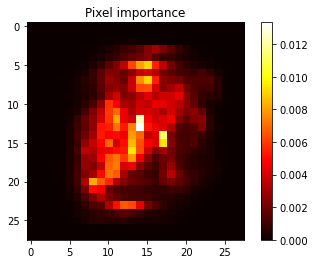

In [ ]:
importances = np.reshape(grid_search_clf.best_estimator_.feature_importances_,(28,28))
fig = plt.imshow(importances,cmap=plt.cm.hot)
plt.title("Pixel importance")
plt.colorbar()
plt.show()

#3. Random Forest with Extremely Randomized Trees

As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

### Grid search - Extremely Randomized Trees 

To compare the performances of the Extremely Randomized Tree classifier and the Random Forest classifier, the grid search was run with the same cv splits, the same hyperparameters and the oob score as measure of performance.   

In [ ]:
extra_tree_grid = ExtraTreesClassifier(bootstrap = True,
                            oob_score = True,
                             n_jobs = -1,
                             random_state = 42)

extra_tree_grid = GridSearchCV(extra_tree_grid, 
                               param_grid = {'n_estimators':[300,450,600],'max_features':['sqrt',0.1,0.3]}, 
                               cv = cv, 
                               scoring = oob_scorer) 

In [ ]:
extra_tree_grid.fit(X_train,y_train)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1,  0])),
             estimator=ExtraTreesClassifier(bootstrap=True, n_jobs=-1,
                                            oob_score=True, random_state=42),
             param_grid={'max_features': ['sqrt', 0.1, 0.3],
                         'n_estimators': [300, 450, 600]},
             scoring=<function oob_scorer at 0x000001DC6BC881F0>)

In [ ]:
extra_tree_cv_results = pd.DataFrame(extra_tree_grid.cv_results_)
pd.pivot_table(extra_tree_cv_results, 
               index = ['param_max_features','param_n_estimators'], 
               values = ['mean_test_score','rank_test_score'])

mean_test_score  rank_test_score
param_max_features param_n_estimators                                  
0.1                300                        0.970750                5
                   450                        0.971066                3
                   600                        0.971366                1
0.3                300                        0.970633                6
                   450                        0.970850                4
                   600                        0.971333                2
sqrt               300                        0.969149                9
                   450                        0.969983                8
                   600                        0.970266                7

Text(0.5, 1.0, 'Confusion matrix - Random Forest')

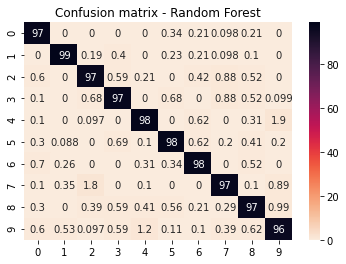

In [ ]:
extreme_pred_opt = extra_tree_grid.best_estimator_.predict(X_test)

extreme_matrix = confusion_matrix(y_test,extreme_pred_opt)
### Transform the values in percentages 
percentages_extreme = extreme_matrix/extreme_matrix.sum(axis=0)*100

### Display Heatmap
f = sns.heatmap(percentages_extreme, annot=True, cmap="rocket_r")
plt.title('Confusion matrix - Random Forest')

In [ ]:
print("Classification report")
print(classification_report(y_test,extreme_pred_opt,digits = 4))
accuracy_extr_tree = accuracy_score(y_test,extreme_pred_opt)
print("Accuracy:", accuracy_extr_tree)

Classification report
              precision    recall  f1-score   support

           0     0.9720    0.9918    0.9818       980
           1     0.9877    0.9894    0.9886      1135
           2     0.9671    0.9690    0.9681      1032
           3     0.9713    0.9713    0.9713      1010
           4     0.9764    0.9695    0.9729       982
           5     0.9774    0.9709    0.9741       892
           6     0.9760    0.9781    0.9771       958
           7     0.9716    0.9660    0.9688      1028
           8     0.9670    0.9620    0.9645       974
           9     0.9593    0.9574    0.9583      1009

    accuracy                         0.9727     10000
   macro avg     0.9726    0.9725    0.9725     10000
weighted avg     0.9727    0.9727    0.9727     10000

Accuracy: 0.9727


For both Extremely Randomized Tree and Random Forest classifiers the best performance (0.9713 and 0.9704, respectively) is reached with:

+ number of estimators = 600
+ max feature = 0.1

The multiclass accuracy on the test set of Extremely Randomized Trees (0.9727   is similar to the one reached by the Random Forest Classifier (0.9711). Therefore even by adding some 'randomness' to the model, this does not influence the performance on the test set. 

#4. Convolutional Neural Network (CNN)

---
***Convolutional neural networks*** (CNNs) are the current state-of-art architecture for image classification task. CNN takes the image's raw pixel data as input and "learns" how to extract these features, applying one or more filters and ultimately infer what object they constitute. CNN uses some layers to gather information and determine some features from the image.



### Data Preparation

Reshaping each image to have a matrix 28,28 and single color channel (scale = 1 - grey)

In [ ]:
print('X-train before reshaping',X_train.shape)

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
print('X-train after reshaping',X_train.shape)
print('X-test after reshaping',X_test.shape)

X-train before reshaping (60000, 28, 28)
X-train after reshaping (60000, 28, 28, 1)
X-test after reshaping (10000, 28, 28, 1)


Pixel intensity values for each image in the dataset are integers in the range between balck and white (0 to 255). We can now normalize the pixel values of greyscale images converting them from unsigned integers to floats and then rescaling them to the range [0,1].

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical 

In [ ]:
### Data Preprocessing 


### Check data type 
print('X data type: ',X_train.dtype)

### Check data shape for labels 
print('shape labels: ',y_train.shape)

def preprocessing(X,y,num_classes):
    ### Data type conversion
    X = X.astype('float32')
    ### Normalization to range 0-1
    X /= 255.0
    ### Conversion 
    y = to_categorical(y,num_classes)
    
    return X,y 

X_trainNN, y_trainNN = preprocessing(X_train,y_train,10)
X_testNN, y_testNN = preprocessing(X_test,y_test,10)


X data type:  uint8
shape labels:  (60000,)


### Model creation

-----
The CNN architecture consists of two main parts:
1. the **feature extraction** via the convolutional and pooling layers
2. the **classification** via the fully connected (FC) layers.

The architecture below is a **2D convolutional layer** with convolution window of (3,3) and 32 output filters followed by **maxpooling layer** of (2,2). The filter maps can then be flattened to provide features to the classifier. It is used the dropout of 0.5: the **drop-out** is a technique used to prevent overfitting. At each iteration during the training time, each neuron has a probability to be disabled. The ***dropout-rate*** is typically around 0.5.  
Between the feature extractor and output layer we add a **dense layer** of 100 nodes. 
All layers will use the ***ReLU activation function***.
As the problem is a multi-class classification task, the last *Dense layer* has 10 nodes, activated by a ***softmax activation function***. 



In [ ]:
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Dropout, MaxPool2D
from keras.models import Sequential

In [ ]:
n_classes = 10
#create model
model = Sequential()
#add model layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dropout (Dropout)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

Compiling the model takes 3 hyperparameters: optimizer, loss and performance metrics.

The optimizer controls the learning rate. We will be using *adam* that adjusts the learning rate throughout training.

We will use categorical_crossentropy as the loss function.

We will use the accuracy performance metric to see the accuracy score on the validation set when we train the model.

In [ ]:
model.compile('adam','categorical_crossentropy', metrics = ['accuracy'])

The ***number of epochs*** and the ***batch size*** are two hyperparameters.

One Epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

As it is not possible that the entire training set is given into a neural network at once, it is divided into Number of Batches. Therefore the batch size is the number of training examples present in a batch and it defines the number of samples to work through before updating the internal model parameters.

In [ ]:
epochs = 25
batch_size = 256
#model training
history = model.fit(x=X_trainNN, 
                    y=y_trainNN, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/25
211/211 [==============================] - 8s 36ms/step - loss: 0.3544 - accuracy: 0.8999 - val_loss: 0.1079 - val_accuracy: 0.9708
Epoch 2/25
211/211 [==============================] - 8s 37ms/step - loss: 0.1257 - accuracy: 0.9624 - val_loss: 0.0736 - val_accuracy: 0.9788
Epoch 3/25
211/211 [==============================] - 8s 36ms/step - loss: 0.0939 - accuracy: 0.9707 - val_loss: 0.0591 - val_accuracy: 0.9843
Epoch 4/25
211/211 [==============================] - 8s 36ms/step - loss: 0.0785 - accuracy: 0.9761 - val_loss: 0.0531 - val_accuracy: 0.9858
Epoch 5/25
211/211 [==============================] - 8s 38ms/step - loss: 0.0653 - accuracy: 0.9793 - val_loss: 0.0507 - val_accuracy: 0.9858
Epoch 6/25
211/211 [==============================] - 8s 37ms/step - loss: 0.0588 - accuracy: 0.9813 - val_loss: 0.0490 - val_accuracy: 0.9872
Epoch 7/25
211/211 [==============================] - 8s 39ms/step - loss: 0.0523 - accuracy: 0.9837 - val_loss: 0.0477 - val_accuracy: 0.9878

In [ ]:
score = model.evaluate(X_testNN,y_testNN)
print("Test loss:", score[0])
accuracy_cnn= score[1]
print("Test accuracy:", accuracy_cnn)

313/313 [==============================] - 1s 2ms/step - loss: 0.0390 - accuracy: 0.9889
Test loss: 0.038966815918684006
Test accuracy: 0.9889000058174133


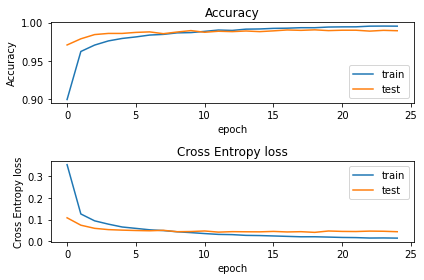

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cross Entropy loss')
plt.ylabel('Cross Entropy loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')

plt.tight_layout()

***Cross-entropy loss***, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. 

----
From the above graph, we can see that the cross entropy loss of the training set decreases rapidly in the first few epochs: this means that at the beginning the model makes many mistakes so the differences between the predicted values and the actual labels are high. At the same time, the model learns 'fast' and reduces this gap in the first epochs. Obvioulsy, by looking at the loss curve of the testing set there is no such a sharp decrease because the model has been already trained and makes 'less' mistakes. Moreover, after the first 10 epochs the loss function of the testing set is higher than the values of the training set and remains steady around 0.04. This can be a sign of overfitting: on one hand the model keeps decreasing the error rate on the training set, whereas in the test set the error rate remains stable. Probably, by running the analysis for more epochs the gap between the two curves would be more evident. 


## Improved Model 

We created an improved version of the previous CNN: we increased the number of layers for the feature extractor. This way the model contains two convolutional and two pooling layers with equal filter size. In the second convolutional layer the number of filters is increased to 64. 

Also the number of neurons of the FC layers is increased to 256.



In [ ]:
# create model

model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size = (2,2), name = 'MaxPooling_1'))
model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), name = 'MaxPooling_2'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
    
model.compile('adam','categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
### Training 
epochs = 25
batch_size = 256
#model training
history = model.fit(x=X_trainNN, 
                    y=y_trainNN, 
                    batch_size=batch_size, 
                    epochs=epochs,validation_split=0.1)

Epoch 1/25
211/211 [==============================] - 11s 54ms/step - loss: 0.3923 - accuracy: 0.8775 - val_loss: 0.0707 - val_accuracy: 0.9788
Epoch 2/25
211/211 [==============================] - 11s 53ms/step - loss: 0.1156 - accuracy: 0.9640 - val_loss: 0.0498 - val_accuracy: 0.9862
Epoch 3/25
211/211 [==============================] - 11s 53ms/step - loss: 0.0861 - accuracy: 0.9733 - val_loss: 0.0396 - val_accuracy: 0.9897
Epoch 4/25
211/211 [==============================] - 11s 53ms/step - loss: 0.0720 - accuracy: 0.9781 - val_loss: 0.0386 - val_accuracy: 0.9883
Epoch 5/25
211/211 [==============================] - 11s 53ms/step - loss: 0.0621 - accuracy: 0.9805 - val_loss: 0.0362 - val_accuracy: 0.9885
Epoch 6/25
211/211 [==============================] - 11s 53ms/step - loss: 0.0538 - accuracy: 0.9834 - val_loss: 0.0355 - val_accuracy: 0.9890
Epoch 7/25
211/211 [==============================] - 11s 53ms/step - loss: 0.0527 - accuracy: 0.9840 - val_loss: 0.0288 - val_accuracy:

In [ ]:
score = model.evaluate(X_testNN,y_testNN)
print("Test loss:", score[0])
accuracy_cnn_improved= score[1]
print("Test accuracy:", accuracy_cnn_improved)

313/313 [==============================] - 1s 3ms/step - loss: 0.0197 - accuracy: 0.9940
Test loss: 0.01972951740026474
Test accuracy: 0.9940000176429749


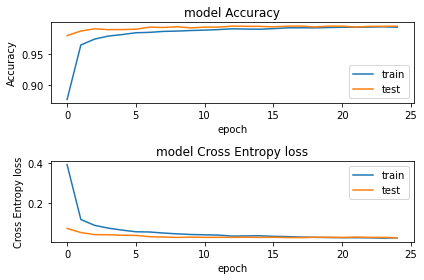

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model Cross Entropy loss')
plt.ylabel('Cross Entropy loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')

plt.tight_layout()

We can see that by modeling the architecture of the CNN we obtained a better outcome: the accuracy of the last model is 0.01 greater than the previous one (0.99 vs 0.98).
Moreover it can be seen that the learning curve of the test set does not cross the one of the training set, as in the previous model. Therefore this model does not show signs of overfitting and performs better in terms of accuracy.

# Conclusion

----
In this project, we have tested different ML models for a handwritten digit classification task on MNIST dataset. 

Data has been split into a training and testing set, both datasets are class-balanced. 
A simple model as the Decision Tree does not achieve a very high accuracy and is more prone to misclassify 4 and 9s, 3 and 5s. Random forests with Decision Tree and Extremely randomized tree show a significant improvement in terms of performance, reaching 97% on the test set. 

However, the best performing model was the improved CNN with accuracy over 99%.

In [ ]:
accuracy= {'Methods': ["Decison Tree", "RF with Random Forest Classifier", 'RF with Extremely Randomized Trees',"CNN", "CNN improved"],
           'Accuracy': [accuracy_tree, accuracy_random_forest,accuracy_extr_tree,accuracy_cnn, accuracy_cnn_improved]}
           
df=pd.DataFrame(accuracy, columns=['Methods','Accuracy'])
df.sort_values(by='Accuracy', ascending=True)

,Methods,Accuracy
0,Decison Tree,0.8799
1,RF with Random Forest Classifier,0.9711
2,RF with Extremely Randomized Trees,0.9727
3,CNN,0.9889
4,CNN improved,0.9940
